In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.eval_measures import meanabs
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.model_selection import KFold
import sklearn
from sklearn.utils import shuffle


import os

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/Colab Notebooks/RhodesUni/survey-roadkill/hybrid-model/"
os.listdir(root_dir)

Mounted at /content/gdrive


['example',
 'timeseries',
 'allCaseFile.xlsx',
 'LSTM.ipynb',
 'model',
 'allCaseFile_Date.xlsx',
 'data_before_arima.csv',
 'pdq_results.csv',
 'allCaseFile_Shift12.csv',
 'allCaseFile_Shift1.csv',
 'arima_residuals_rstd.csv',
 'data_before_arima.gsheet',
 'count (1).gsheet',
 'count.csv',
 'data_balanced_before_arima.xlsx',
 'ARIMA_hybrid_original.ipynb',
 'images',
 'ARIMA_hybrid_normalise.ipynb',
 'count.gsheet',
 'allCaseFile_Date2.xlsx',
 'allCaseFile_Date_imutate.xlsx',
 'data_before_arima2.csv',
 'roadkill_data_preparation.ipynb',
 'LSTM_predictions.ipynb',
 'ARIMA_hybrid.ipynb',
 'covid_19_data.csv',
 'data_before_arima2.xlsx.gsheet',
 'hybplot2.png',
 'Hybrid_AR&LSTM_model.ipynb',
 'data_before_arima_reformulate.xlsx',
 'Copy of SVM animal forecasting.ipynb',
 'data_before_arima2 (1).xlsx',
 'LSTM_predictions_2.ipynb',
 'hybrid_reformulate.ipynb',
 'total_species_killed.xlsx',
 '19.csv',
 'total_roadkill.xlsx',
 'hybrid_2.ipynb',
 'expenses.xlsx',
 'daily_roadkill.xlsx',
 'y

# Visualization and Preprocessing

In [ ]:
#dataset
data = pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/RhodesUni/survey-roadkill/hybrid-model/data.xlsx")

In [ ]:
data

,Species,Date,Roadkill,Class,Order,Family
0,Aardvark,2011-06-30,1,Mammalia,Tubulidentata,Orycteropodidae
1,Aardvark,2011-07-31,1,Mammalia,Tubulidentata,Orycteropodidae
2,Aardvark,2014-05-24,1,Mammalia,Tubulidentata,Orycteropodidae
3,Aardvark,2014-06-24,1,Mammalia,Tubulidentata,Orycteropodidae
4,Aardvark,2014-07-25,1,Mammalia,Tubulidentata,Orycteropodidae
...,...,...,...,...,...,...
4794,Yellow-fronted Canary,2013-05-09,1,Aves,Passeriformes,Fringillidae
4795,Yellow-throated Petronia,2011-12-27,1,Aves,Passeriformes,Passeridae
4796,Yellow-throated Petronia,2012-02-18,1,Aves,Passeriformes,Passeridae
4797,Yellow-throated Petronia,2013-01-07,1,Aves,Passeriformes,Passeridae


In [ ]:
#data = pd.DataFrame(data[['Date','Roadkill']])

In [ ]:
data=data.set_index(data['Date'])
data

,Species,Date,Roadkill,Class,Order,Family
Date,,,,,,
2011-06-30,Aardvark,2011-06-30,1,Mammalia,Tubulidentata,Orycteropodidae
2011-07-31,Aardvark,2011-07-31,1,Mammalia,Tubulidentata,Orycteropodidae
2014-05-24,Aardvark,2014-05-24,1,Mammalia,Tubulidentata,Orycteropodidae
2014-06-24,Aardvark,2014-06-24,1,Mammalia,Tubulidentata,Orycteropodidae
2014-07-25,Aardvark,2014-07-25,1,Mammalia,Tubulidentata,Orycteropodidae
...,...,...,...,...,...,...
2013-05-09,Yellow-fronted Canary,2013-05-09,1,Aves,Passeriformes,Fringillidae
2011-12-27,Yellow-throated Petronia,2011-12-27,1,Aves,Passeriformes,Passeridae
2012-02-18,Yellow-throated Petronia,2012-02-18,1,Aves,Passeriformes,Passeridae


In [ ]:
value_counts= pd.DataFrame(data['Species'].value_counts(sort=True, ascending=True))
value_counts

,Species
Unknown Hyaena,1
Unknown Bat,1
Bushveld Gerbil,1
African Elephant,1
Cheetah,1
...,...
Black-backed Jackal,199
Unknown Mammal,227
Unknown Rabbit,232
Mozambique spitting cobra,410


Text(0, 0.5, 'Count')

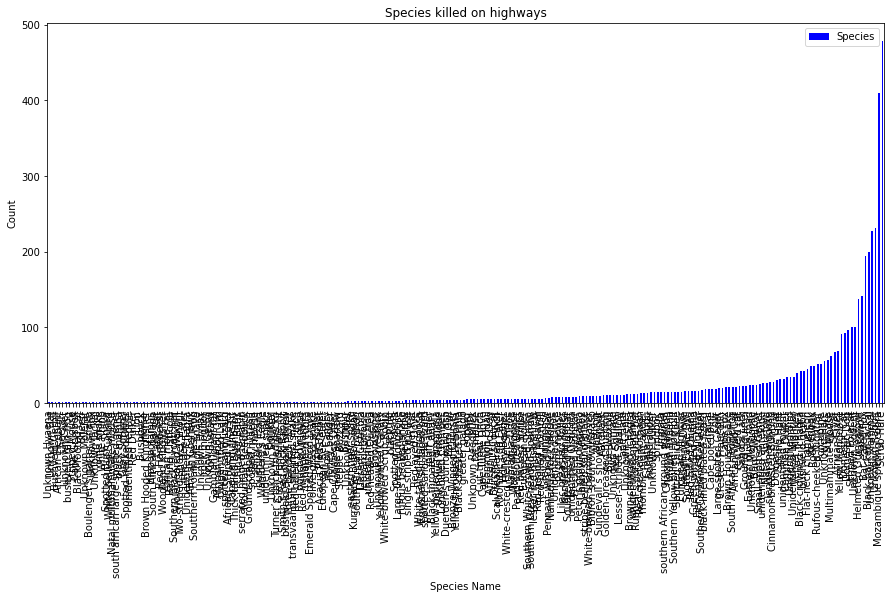

In [ ]:
data['Species'].value_counts(sort=True, ascending=True).plot.bar(width=0.5,figsize=(15,7), color ='b')
plt.title('Species killed on highways')
plt.legend()
plt.xlabel('Species Name')
plt.ylabel('Count')


In [ ]:
data['Species'].value_counts()

Scrub Hare                   479
Mozambique spitting cobra    410
Unknown Rabbit               232
Unknown Mammal               227
Black-backed Jackal          199
                            ... 
Cheetah                        1
African Elephant               1
Bushveld Gerbil                1
Unknown Bat                    1
Unknown Hyaena                 1
Name: Species, Length: 246, dtype: int64

In [ ]:
data.groupby('Class')['Species'].value_counts()

Class     Species                 
Amphibia  Eastern olive toad           24
          unidentified frog             3
          Soutthern Foam Nest Frog      2
          bushveld rain frog            1
Aves      Helmeted Guineafowl         137
                                     ... 
Reptilia  Boulenger’s garter snake      1
          Spotted Bush Snake            1
          black mamba                   1
          unidentified reptile          1
          vine snake                    1
Name: Species, Length: 247, dtype: int64

Text(0, 0.5, 'number of wildlife roadkill')

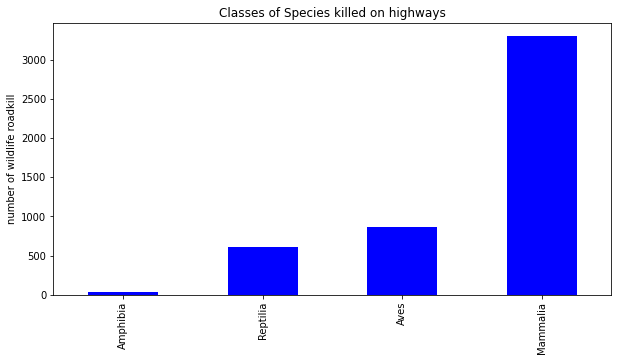

In [ ]:
data['Class'].value_counts(sort=True, ascending=True).plot.bar(width=0.5,figsize=(10,5), color ='b')
plt.title('Classes of Species killed on highways')
#plt.legend()
#plt.xlabel('Class Name')
plt.ylabel('number of wildlife roadkill')


In [ ]:
#results from models
results = pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/RhodesUni/survey-roadkill/hybrid-model/model-results.xlsx")
results

,Models,MAE,RMSE
0,LSTM-only,0.089811,0.104470
1,AR-only,0.110000,0.260000
2,ARIMA-only,0.082454,0.230000
3,AR-LSTM,0.010137,0.013769
4,ARIMA-LSTM,0.023709,0.037370


Text(0.5, 0, '')

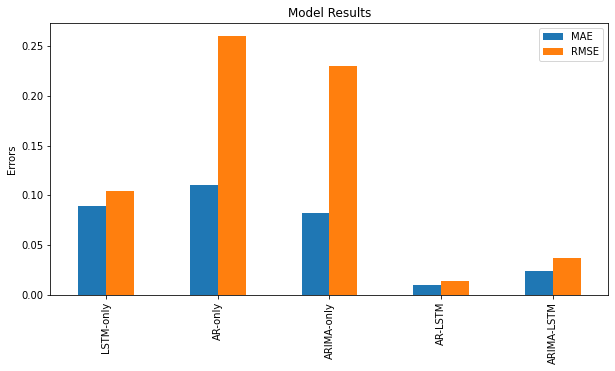

In [ ]:
results.plot(kind='bar', x='Models', title='Model Results', figsize=(10,5))
plt.ylabel('Errors')
plt.xlabel('')

In [ ]:
daily=pd.DataFrame(data['Roadkill'].resample('D').sum())
weekly=pd.DataFrame(data['Roadkill'].resample('W').sum())
monthly=pd.DataFrame(data['Roadkill'].resample('M').sum())


In [ ]:
daily

,Roadkill
Date,
2011-01-01,4
2011-01-02,6
2011-01-03,6
2011-01-04,2
2011-01-05,2
...,...
2014-12-27,2
2014-12-28,2
2014-12-29,2


In [ ]:
daily_original = pd.DataFrame(daily)
x_o = daily_original.copy()

In [ ]:
x_o

,Roadkill
Date,
2011-01-01,4
2011-01-02,6
2011-01-03,6
2011-01-04,2
2011-01-05,2
...,...
2014-12-27,2
2014-12-28,2
2014-12-29,2


In [ ]:
daily_original.index = pd.RangeIndex(start=0, stop=0+len(daily_original), step=1)
daily_original


,Roadkill
0,4
1,6
2,6
3,2
4,2
...,...
1456,2
1457,2
1458,2
1459,2


In [ ]:
#split the data into train and test
train, test = np.split(daily_original, [int(.8*len(daily_original))])

In [ ]:
train

,Roadkill
0,4
1,6
2,6
3,2
4,2
...,...
1163,5
1164,5
1165,5
1166,5


In [ ]:
test

,Roadkill
1168,4
1169,4
1170,4
1171,4
1172,4
...,...
1456,2
1457,2
1458,2
1459,2


In [ ]:
#drop index to consider the series (days count)
daily.reset_index(drop=True, inplace=True)

In [ ]:
#daily.to_excel("/content/gdrive/My Drive/Colab Notebooks/RhodesUni/survey-roadkill/hybrid-model/daily_total_roadkill.xlsx")

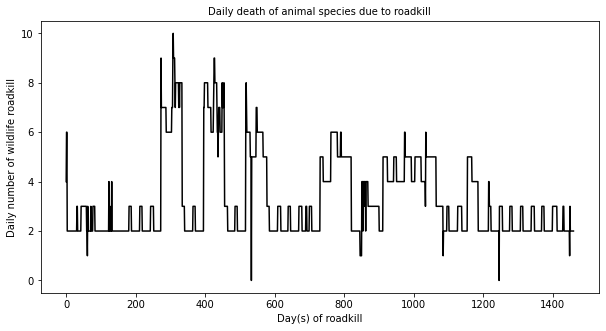

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(daily['Roadkill'],color='black')
plt.xlabel('Day(s) of roadkill', fontsize=10)
plt.ylabel('Daily number of wildlife roadkill', fontsize=10)
plt.title("Daily death of animal species due to roadkill",fontsize=10)
#plt.legend()
#plt.savefig('hybplot1.png')584
plt.show()

In [ ]:
weekly

,Roadkill
Date,
2011-01-02,10
2011-01-09,18
2011-01-16,14
2011-01-23,14
2011-01-30,14
...,...
2014-12-07,17
2014-12-14,14
2014-12-21,14


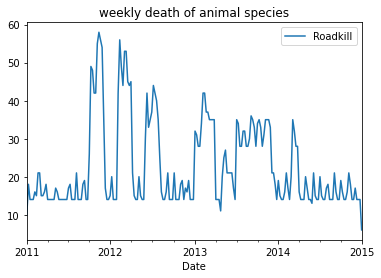

In [ ]:
weekly.plot(title = 'weekly death of animal species')

In [ ]:
weekly.describe()

,Roadkill
count,210.000000
mean,22.852381
std,11.372851
min,6.000000
25%,14.000000
50%,17.500000
75%,31.000000
max,58.000000


In [ ]:
#daily.to_excel("/content/gdrive/My Drive/Colab Notebooks/RhodesUni/survey-roadkill/hybrid-model/daily_total.xlsx")

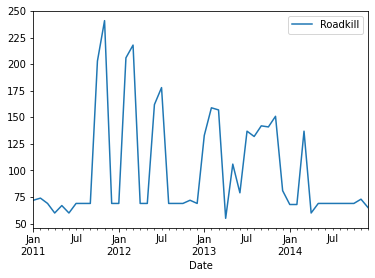

In [ ]:
monthly.plot()

In [ ]:
# determing the stationarity of the data using adfuller test
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(daily['Roadkill'])
test_result

(-5.57658976726231,
 1.4275459180800764e-06,
 1,
 1459,
 {'1%': -3.4348399537053482,
  '10%': -2.5678257404326903,
  '5%': -2.8635230163107837},
 2335.712104792114)

In [ ]:
# determing the stationarity of the data using adfuller test
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(daily['Roadkill'])
test_result

(-5.57658976726231,
 1.4275459180800764e-06,
 1,
 1459,
 {'1%': -3.4348399537053482,
  '10%': -2.5678257404326903,
  '5%': -2.8635230163107837},
 2335.712104792114)

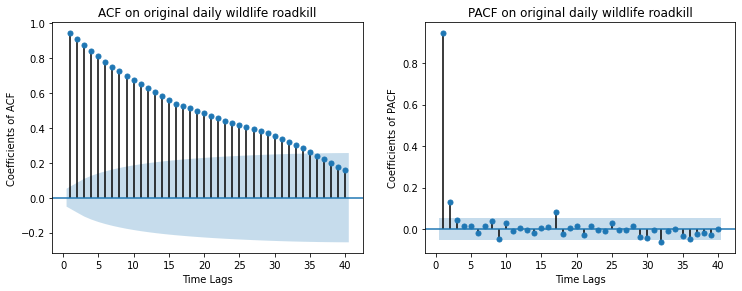

In [ ]:
# to use ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
# ADF and PACF to determine the model and the model parameters using original data
fig, ax = plt.subplots(1,2,figsize=(12.24,4.24))
#fig = plt.figure(figsize=(8,6))
#ax1 = fig.add_subplot(211)
#acf used to determine MA model params
fig1 = sm.graphics.tsa.plot_acf(daily.Roadkill.squeeze().dropna(),lags=40,ax=ax[0],zero=False, title='ACF on original daily wildlife roadkill')
ax[0].set_xlabel("Time Lags")
ax[0].set_ylabel("Coefficients of ACF")
#ax2 = fig.add_subplot(212)
# pacf used to determine AR model params 
fig2 = sm.graphics.tsa.plot_pacf(daily.Roadkill.squeeze().dropna(),lags=40,ax=ax[1], zero=False,title='PACF on original daily wildlife roadkill')
ax[1].set_xlabel("Time Lags")
ax[1].set_ylabel("Coefficients of PACF")
plt.show()

In [ ]:
daily.describe()

,Roadkill
count,1461.000000
mean,3.284736
std,1.709672
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,10.000000


In [ ]:
daily['Roadkill'] = daily.Roadkill.rolling(window=3).mean().shift(1)
daily = daily.dropna()
daily


,Roadkill
3,5.333333
4,4.666667
5,3.333333
6,2.000000
7,2.000000
...,...
1456,2.000000
1457,2.000000
1458,2.000000
1459,2.000000


In [ ]:
daily.describe()

,Roadkill
count,1458.000000
mean,3.285551
std,1.671602
min,1.000000
25%,2.000000
50%,2.666667
75%,4.000000
max,9.333333


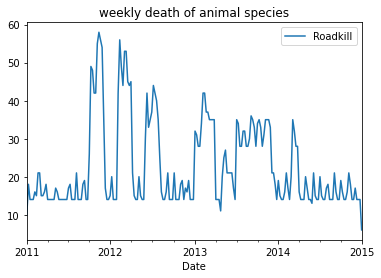

In [ ]:
weekly.plot(title = 'weekly death of animal species')

weekly = pd.DataFrame(weekly).
weekly.plot()

In [ ]:
# determing the stationarity of the data using adfuller test
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(daily['Roadkill'])
test_result

(-3.715122524279624,
 0.0039054011644615457,
 24,
 1433,
 {'1%': -3.434921564946909,
  '10%': -2.567844919904611,
  '5%': -2.8635590328954197},
 -663.9549544538759)

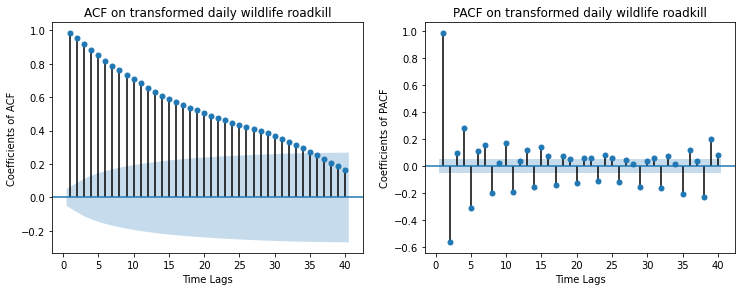

In [ ]:
# to use ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
# ADF and PACF to determine the model and the model parameters using original data
fig, ax = plt.subplots(1,2,figsize=(12.24,4.24))
#fig = plt.figure(figsize=(8,6))some
#ax1 = fig.add_subplot(211)
#acf used to determine MA model params
fig1 = sm.graphics.tsa.plot_acf(daily.Roadkill.squeeze().dropna(),lags=40,ax=ax[0],zero=False, title='ACF on transformed daily wildlife roadkill')
ax[0].set_xlabel("Time Lags")
ax[0].set_ylabel("Coefficients of ACF")
#ax2 = fig.add_subplot(212)
# pacf used to determine AR model params 
fig2 = sm.graphics.tsa.plot_pacf(daily.Roadkill.squeeze().dropna(),lags=40,ax=ax[1], zero=False,title='PACF on transformed daily wildlife roadkill')
ax[1].set_xlabel("Time Lags")
ax[1].set_ylabel("Coefficients of PACF")
plt.show()



In [ ]:
#train_size = int(len(weekly)*0.7)
#train, test =weekly[0:train_size], weekly[train_size:]


In [ ]:
#pip install pmdarima

In [ ]:
#from pmdarima.arima import auto_arima
#auto_arima_fit = auto_arima(daily['Roadkill'], start_p=1, start_q=1,
                            # max_p=5, max_q=5,
                            # d=1,trace=True,
                             #error_action='ignore',
                             #suppress_warnings=True,
                             #stepwise=True)

                             #2,1,1 best model order

In [ ]:
#from pmdarima.arima import auto_arima
#auto_arima_fit = auto_arima(train['Roadkill'], start_p=1, start_q=1,
                             #max_p=5, max_q=5,
                             #d=1,trace=True,
                             #error_action='ignore',
                             #suppress_warnings=True,
                             #stepwise=True)

# Building ARIMA Model using original data

In [ ]:
# building the model with the parameters we've discovered and fitting it to the training set
# To reproduce AR-only model order = 5,0,0. For ARIMA-only model order is 5,0,2
model = ARIMA(daily, order=(5,0,2)) 
arima_model_fit = model.fit()
print(arima_model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               Roadkill   No. Observations:                 1458
Model:                     ARMA(5, 2)   Log Likelihood                 390.489
Method:                       css-mle   S.D. of innovations              0.184
Date:                Sun, 09 Jan 2022   AIC                           -762.978
Time:                        07:28:51   BIC                           -715.414
Sample:                             0   HQIC                          -745.234
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.2808      0.316     10.386      0.000       2.662       3.900
ar.L1.Roadkill     0.8144      0.026     30.937      0.000       0.763       0.866
ar.L2.Roadkill     0.0907      0.034

<Figure size 720x360 with 0 Axes>

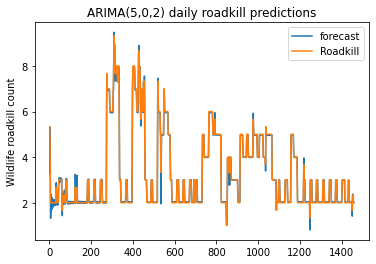

<Figure size 720x360 with 0 Axes>

In [ ]:
# dynamic=False meaning in-sample lagged values are used for prediction
arima_model_fit.plot_predict(dynamic=False)
plt.ylabel("Wildlife roadkill count")
plt.title("ARIMA(5,0,2) daily roadkill predictions")
plt.figure(figsize=(10, 5))


In [ ]:
arima_model_fit.fittedvalues

3       3.280817
4       5.303085
5       4.252409
6       2.561485
7       1.317973
          ...   
1456    2.027819
1457    2.017318
1458    2.015693
1459    2.024588
1460    2.017328
Length: 1458, dtype: float64

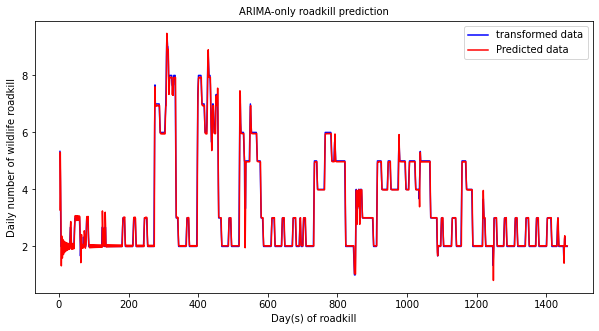

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(daily, label='transformed data', color ='blue')
plt.plot(arima_model_fit.fittedvalues, color='red',label='Predicted data')

plt.xlabel('Day(s) of roadkill', fontsize=10)
plt.ylabel('Daily number of wildlife roadkill', fontsize=10)
#plt.title("AR-only roadkill prediction",fontsize=10)
plt.title("ARIMA-only roadkill prediction",fontsize=10)

plt.legend()
plt.show()

In [ ]:
daily_original

,Roadkill
0,NaN
1,NaN
2,NaN
3,5.333333
4,4.666667
...,...
1456,2.000000
1457,2.000000
1458,2.000000
1459,2.000000


In [ ]:
x_o

,Roadkill
Date,
2011-01-01,4
2011-01-02,6
2011-01-03,6
2011-01-04,2
2011-01-05,2
...,...
2014-12-27,2
2014-12-28,2
2014-12-29,2


In [ ]:
daily
daily_to_both = daily.copy()
daily_to_moving_avg = daily.copy()
daily_to_both

,Roadkill
3,5.333333
4,4.666667
5,3.333333
6,2.000000
7,2.000000
...,...
1456,2.000000
1457,2.000000
1458,2.000000
1459,2.000000


In [ ]:
x_o = x_o.reset_index()
x_o

,Date,Roadkill
0,2011-01-01,4
1,2011-01-02,6
2,2011-01-03,6
3,2011-01-04,2
4,2011-01-05,2
...,...,...
1456,2014-12-27,2
1457,2014-12-28,2
1458,2014-12-29,2
1459,2014-12-30,2


In [ ]:
x_o = x_o.drop(['Date'], axis = 1)
x_o

,Roadkill
0,4
1,6
2,6
3,2
4,2
...,...
1456,2
1457,2
1458,2
1459,2


In [ ]:
x_o= pd.DataFrame(x_o[3:1461])
x_o

,Roadkill
3,2
4,2
5,2
6,2
7,2
...,...
1456,2
1457,2
1458,2
1459,2


In [ ]:
original_to_both = x_o.copy()
original_to_original = x_o.copy()


In [ ]:
both_datasets = pd.DataFrame(original_to_both)
both_datasets['daily MV'] = pd.DataFrame(daily_to_both)
both_datasets

,Roadkill,daily MV
3,2,5.333333
4,2,4.666667
5,2,3.333333
6,2,2.000000
7,2,2.000000
...,...,...
1456,2,2.000000
1457,2,2.000000
1458,2,2.000000
1459,2,2.000000


<Figure size 1440x1080 with 0 Axes>

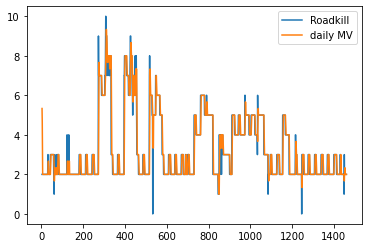

In [ ]:
plt.figure(figsize=(20, 15))
both_datasets.plot()

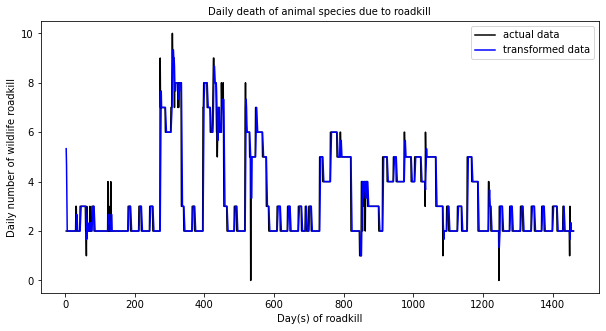

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(both_datasets['Roadkill'],label="actual data", color='black')
plt.plot(both_datasets['daily MV'], label="transformed data", color = 'blue')
plt.xlabel('Day(s) of roadkill', fontsize=10)
plt.ylabel('Daily number of wildlife roadkill', fontsize=10)
plt.title("Daily death of animal species due to roadkill",fontsize=10)
plt.legend()


In [ ]:
fittedvalues = arima_model_fit.predict()

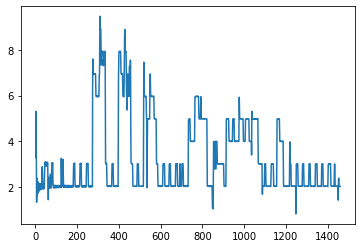

In [ ]:
fittedvalues.plot()

In [ ]:
fittedvalues = pd.DataFrame(fittedvalues)
fittedvalues

,0
3,3.280817
4,5.303085
5,4.252409
6,2.561485
7,1.317973
...,...
1456,2.027819
1457,2.017318
1458,2.015693
1459,2.024588


In [ ]:
original_to_original

,Roadkill
3,2
4,2
5,2
6,2
7,2
...,...
1456,2
1457,2
1458,2
1459,2


In [ ]:
original_fitted = pd.DataFrame(fittedvalues[0])

In [ ]:
original_fitted['original'] = pd.DataFrame(original_to_original)
original_fitted

,0,original
3,3.280817,2
4,5.303085,2
5,4.252409,2
6,2.561485,2
7,1.317973,2
...,...,...
1456,2.027819,2
1457,2.017318,2
1458,2.015693,2
1459,2.024588,2


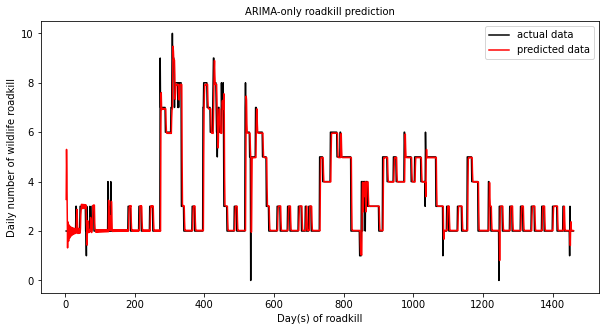

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(original_fitted['original'],label="actual data", color='black')
plt.plot(original_fitted[0], label= "predicted data", color = 'red')
plt.xlabel('Day(s) of roadkill', fontsize=10)
plt.ylabel('Daily number of wildlife roadkill', fontsize=10)
plt.title("ARIMA-only roadkill prediction",fontsize=10)
#plt.title("AR-only roadkill prediction",fontsize=10)
plt.legend()


In [ ]:
#check the errors on the original data
e_mae = meanabs(original_fitted['original'].values, original_fitted[0].values)
e_mse = mse(original_fitted['original'].values, original_fitted[0].values)
e_rmse = rmse(original_fitted['original'].values, original_fitted[0].values)
print('MAE %.2f' % e_mae )
#print('MSE %.2f' % e_mse )
print('RMSE %.2f' % e_rmse )


MAE 0.29
RMSE 0.72


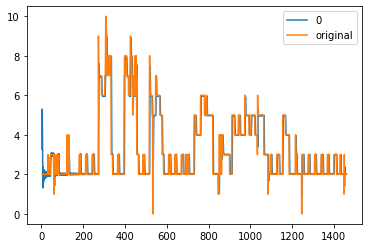

In [ ]:
original_fitted.plot()

In [ ]:
moving_avg_fitted = fittedvalues.copy()
moving_avg_fitted

,0
3,3.280817
4,5.303085
5,4.252409
6,2.561485
7,1.317973
...,...
1456,2.027819
1457,2.017318
1458,2.015693
1459,2.024588


In [ ]:
daily_to_moving_avg

,Roadkill
3,5.333333
4,4.666667
5,3.333333
6,2.000000
7,2.000000
...,...
1456,2.000000
1457,2.000000
1458,2.000000
1459,2.000000


In [ ]:
moving_avg_fitted['moving avg'] = pd.DataFrame(daily_to_moving_avg)
moving_avg_fitted

,0,moving avg
3,3.280817,5.333333
4,5.303085,4.666667
5,4.252409,3.333333
6,2.561485,2.000000
7,1.317973,2.000000
...,...,...
1456,2.027819,2.000000
1457,2.017318,2.000000
1458,2.015693,2.000000
1459,2.024588,2.000000


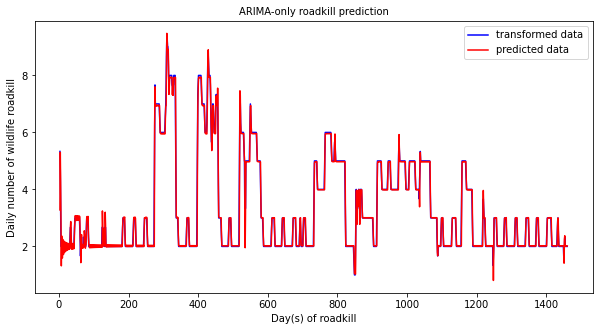

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(moving_avg_fitted['moving avg'],label="transformed data", color='blue')
plt.plot(moving_avg_fitted[0], label="predicted data", color = 'red')
plt.xlabel('Day(s) of roadkill', fontsize=10)
plt.ylabel('Daily number of wildlife roadkill', fontsize=10)
plt.title("ARIMA-only roadkill prediction",fontsize=10)
#plt.title("AR-only roadkill prediction",fontsize=10)
plt.legend()


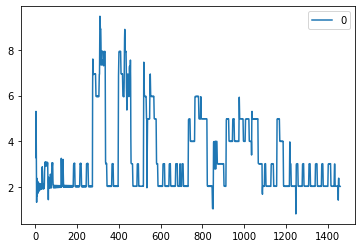

In [ ]:
fittedvalues.plot()

In [ ]:
from scipy.ndimage.interpolation import shift
import numpy as np

In [ ]:

#x = np.arange(25, len(data))
#slicew = slice(400, 600)
#data = data[:,0][-len(x):]#[slicew]

#pylab.figure(figsize=(10, 5))
#arima_only = arima_only[:,0][-len(x):]#[slicew]

#arima_only_interpolated = shift(arima_only, -2, cval=arima_only[-1])

#pylab.plot(x, data, 'k', label='actual data')
#pylab.plot(x, arima_only , 'b', label=r'ARIMA-only')
#pylab.plot(x, arima_only_interpolated , 'r', label='Shift ARIMA-only')
#pylab.legend()

In [ ]:
fittedvalues

,0
3,3.280817
4,5.303085
5,4.252409
6,2.561485
7,1.317973
...,...
1456,2.027819
1457,2.017318
1458,2.015693
1459,2.024588


In [ ]:
actual_data = pd.DataFrame(original_fitted['original'].copy())
actual_data

,original
3,2
4,2
5,2
6,2
7,2
...,...
1456,2
1457,2
1458,2
1459,2


In [ ]:
print(actual_data.shape, fittedvalues.shape)

(1458, 1) (1458, 1)


In [ ]:
actual_data = np.save('/content/gdrive/My Drive/Colab Notebooks/RhodesUni/survey-roadkill/hybrid-model/actual_data.npy', actual_data)
arima_only = np.save('/content/gdrive/My Drive/Colab Notebooks/RhodesUni/survey-roadkill/hybrid-model/arima_only_data.npy', fittedvalues)
#ar_predicted_data = np.save('/content/gdrive/My Drive/Colab Notebooks/RhodesUni/survey-roadkill/hybrid-model/ar_predicted_data.npy', fittedvalues)

In [ ]:
actual_data = np.load('/content/gdrive/My Drive/Colab Notebooks/RhodesUni/survey-roadkill/hybrid-model/actual_data.npy')
arima_only = np.load('/content/gdrive/My Drive/Colab Notebooks/RhodesUni/survey-roadkill/hybrid-model/arima_only_data.npy')

In [ ]:
#fittedvalues

In [ ]:
x = np.arange(0, len(actual_data))
#slicew = slice(400, 600)
actual_data = actual_data[:,0][-len(x):]#[slicew]

#pylab.figure(figsize=(10, 5))
arima_only = arima_only[:,0][-len(x):]#[slicew]

In [ ]:
arima_only_interpolated= shift(arima_only, -2, cval=arima_only[-1])

In [ ]:
arima_only_interpolated

array([4.25240893, 2.56148514, 1.31797262, ..., 2.01732841, 2.01732841,
       2.01732841])

In [ ]:
import pylab

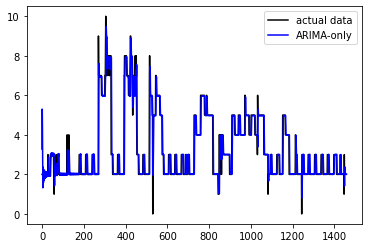

In [ ]:
pylab.plot(x, actual_data, 'k', label='actual data')
pylab.plot(x, arima_only , 'b', label=r'ARIMA-only')
pylab.legend()

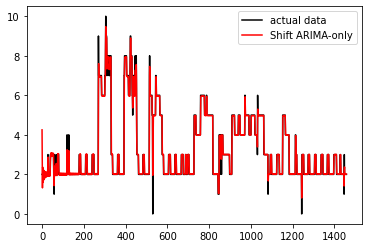

In [ ]:
pylab.plot(x, actual_data, 'k', label='actual data')
pylab.plot(x, arima_only_interpolated , 'r', label='Shift ARIMA-only')
pylab.legend()

In [ ]:
arima_only_interpolated = pd.DataFrame(arima_only_interpolated)
arima_only_interpolated

,0
0,4.252409
1,2.561485
2,1.317973
3,2.368742
4,2.229558
...,...
1453,2.015693
1454,2.024588
1455,2.017328
1456,2.017328


In [ ]:
actual_data = pd.DataFrame(actual_data)
actual_data

,0
0,2
1,2
2,2
3,2
4,2
...,...
1453,2
1454,2
1455,2
1456,2


In [ ]:
residuals= pd.DataFrame(actual_data - arima_only_interpolated)
residuals

,0
0,-2.252409
1,-0.561485
2,0.682027
3,-0.368742
4,-0.229558
...,...
1453,-0.015693
1454,-0.024588
1455,-0.017328
1456,-0.017328


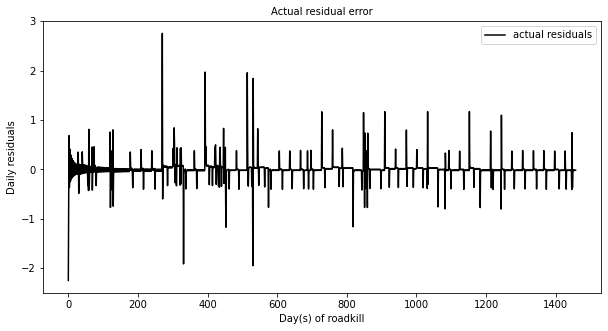

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(residuals,label="actual residuals", color='black')
plt.xlabel('Day(s) of roadkill', fontsize=10)
plt.ylabel('Daily residuals', fontsize=10)
plt.title("Actual residual error",fontsize=10)
plt.legend()


In [ ]:
#split the data into train and test
X_preds, y_preds = np.split(arima_only_interpolated, [int(.8*len(arima_only_interpolated))])

In [ ]:
y_preds

,0
1166,4.014459
1167,3.987371
1168,3.988207
1169,3.997747
1170,3.984920
...,...
1453,2.015693
1454,2.024588
1455,2.017328
1456,2.017328


In [ ]:
#split the data into train and test
X_daily, y_daily = np.split(actual_data, [int(.8*len(actual_data))])

In [ ]:
test

,Roadkill
1168,4
1169,4
1170,4
1171,4
1172,4
...,...
1456,2
1457,2
1458,2
1459,2


In [ ]:
#delete the first one row
test = test.iloc[1:]
test

,Roadkill
1169,4
1170,4
1171,4
1172,4
1173,4
...,...
1456,2
1457,2
1458,2
1459,2


In [ ]:
y_preds

,0
1166,4.014459
1167,3.987371
1168,3.988207
1169,3.997747
1170,3.984920
...,...
1453,2.015693
1454,2.024588
1455,2.017328
1456,2.017328


In [ ]:
len(X_daily)

1166

In [ ]:
len(y_daily)

292

In [ ]:
len(X_preds)

1166

In [ ]:
len(y_preds)

292

In [ ]:
residuals = pd.DataFrame(residuals)
residuals.rename(columns={'0':'residuals'})
residuals

,0
0,-2.252409
1,-0.561485
2,0.682027
3,-0.368742
4,-0.229558
...,...
1453,-0.015693
1454,-0.024588
1455,-0.017328
1456,-0.017328


In [ ]:
len(residuals)

1458

No handles with labels found to put in legend.


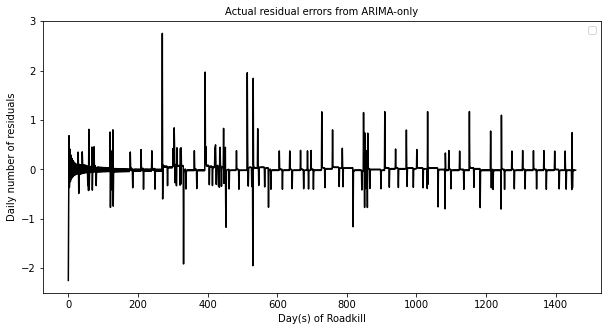

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(residuals[0],color='black')#,label='Roadkill data')
plt.xlabel('Day(s) of Roadkill', fontsize=10)
plt.ylabel('Daily number of residuals', fontsize=10)
#plt.title("Actual residual errors from AR-only",fontsize=10)
plt.title("Actual residual errors from ARIMA-only",fontsize=10)
plt.legend()
#plt.savefig('hybplot1.png')584
plt.show()

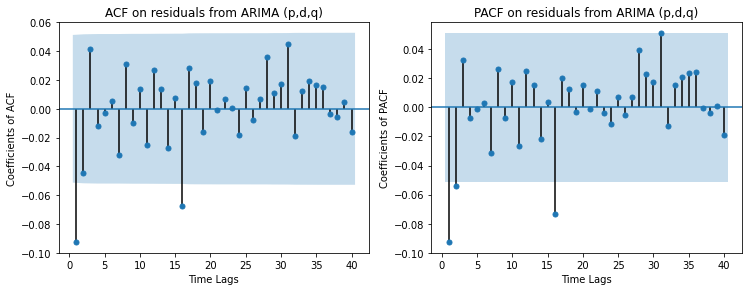

In [ ]:
# to use ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
# ADF and PACF to determine the model and the model parameters using original data
fig, ax = plt.subplots(1,2,figsize=(12.24,4.24))
#fig = plt.figure(figsize=(8,6))
#ax1 = fig.add_subplot(211)
#acf used to determine MA model params
fig1 = sm.graphics.tsa.plot_acf(residuals[0].dropna(),lags=40,ax=ax[0],zero=False, title='ACF on residuals from ARIMA (p,d,q)')
ax[0].set_xlabel("Time Lags")
ax[0].set_ylabel("Coefficients of ACF")
#ax2 = fig.add_subplot(212)
# pacf used to determine AR model params 
fig2 = sm.graphics.tsa.plot_pacf(residuals[0].dropna(),lags=40,ax=ax[1], zero=False,title='PACF on residuals from ARIMA (p,d,q)')
ax[1].set_xlabel("Time Lags")
ax[1].set_ylabel("Coefficients of PACF")
plt.show()

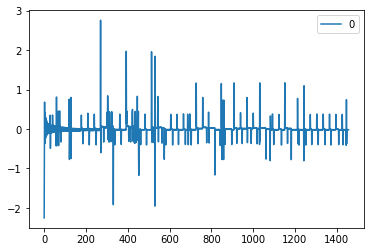

In [ ]:
residuals.plot()